In [1]:
#import library.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#Reading the sales_data csv file, loading the dataset.
df = pd.read_excel("C:/Ai/Group Project Data-SFD Data-Toronto Police (1).xlsx")
df2 = df[['OCC_DOY', 'OCC_YEAR', 'OCC_MONTH', 'DEATH', 'INJURIES','HOOD_158', 'NEIGHBOURHOOD_158']]

#把数据中的no specific area 清掉了
df2.loc[:,'HOOD_158'] = df2['HOOD_158'].replace('NSA', np.nan)
df2.loc[:,'NEIGHBOURHOOD_158'] = df2['NEIGHBOURHOOD_158'].replace('NSA', np.nan)
df2=df2.dropna(subset=['HOOD_158','NEIGHBOURHOOD_158'])
df2.info()
print(df2.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
Index: 5643 entries, 0 to 5706
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   OCC_DOY            5643 non-null   int64 
 1   OCC_YEAR           5643 non-null   int64 
 2   OCC_MONTH          5643 non-null   object
 3   DEATH              5643 non-null   int64 
 4   INJURIES           5643 non-null   int64 
 5   HOOD_158           5643 non-null   object
 6   NEIGHBOURHOOD_158  5643 non-null   object
dtypes: int64(4), object(3)
memory usage: 352.7+ KB
OCC_DOY              0
OCC_YEAR             0
OCC_MONTH            0
DEATH                0
INJURIES             0
HOOD_158             0
NEIGHBOURHOOD_158    0
dtype: int64


In [2]:
#描述每一年里发生次数最多的月份和次数
df2.groupby('OCC_YEAR')[['OCC_MONTH']].describe(include='all')


OCC_MONTH                     
             count unique      top freq
OCC_YEAR                               
2004           183     12      May   24
2005           251     12     July   32
2006           208     12     June   25
2007           202     12     July   26
2008           235     12     July   32
2009           247     12   August   36
2010           251     12     July   37
2011           223     12  October   29
2012           215     12  January   30
2013           195     12   August   33
2014           177     12  October   21
2015           288     12     June   40
2016           407     12   August   48
2017           392     12     July   44
2018           427     12      May   54
2019           492     12  October   57
2020           462     12   August   68
2021           409     12     July   51
2022           379     12     June   40

In [3]:
df3 = df2.groupby('OCC_YEAR')
df4=df2.groupby('OCC_MONTH')

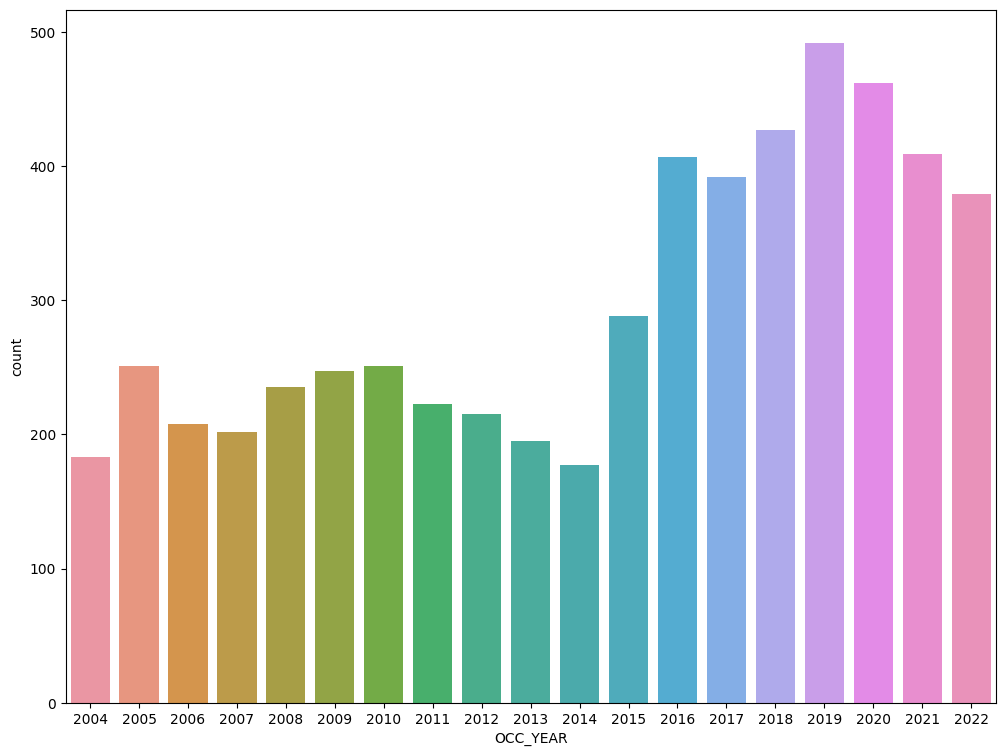

In [21]:
fig= plt.subplots(figsize=(12,9))
sns.countplot(
    x = 'OCC_YEAR',
    data=df2
)
#plt.xticks(range(2004,2023,1))
plt.show()

<Axes: xlabel='OCC_YEAR,OCC_MONTH'>

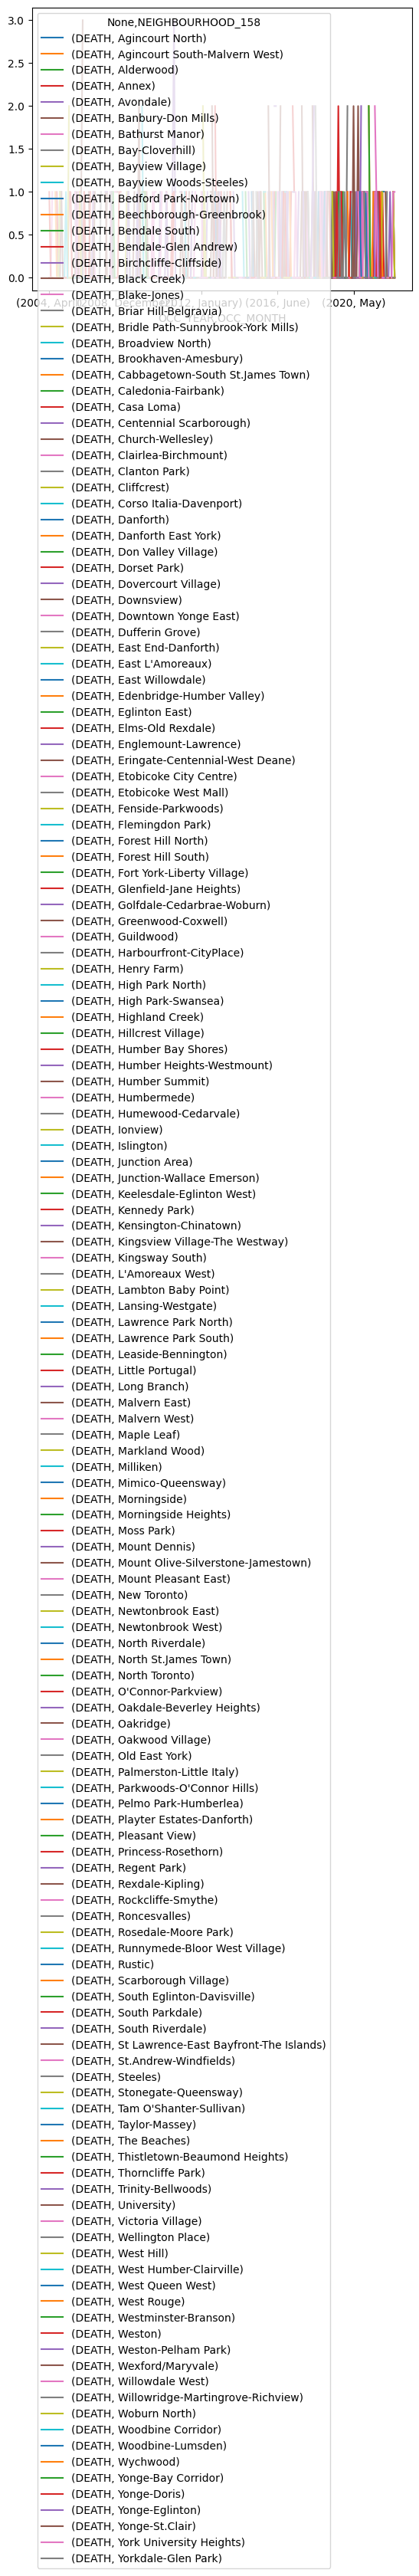

In [23]:

table1 = df2.pivot_table(index=['OCC_YEAR','OCC_MONTH'],values=['DEATH'], columns='NEIGHBOURHOOD_158',aggfunc='sum')
table1.plot()

In [37]:
df2['sum of Death and Juries'] = df2.loc[:,['DEATH','INJURIES']]

DEATH                                          
NEIGHBOURHOOD_158 Agincourt North Agincourt South-Malvern West Alderwood   
HOOD_158                                                                   
1.0                           NaN                          NaN       NaN  \
2.0                           NaN                          NaN       NaN   
3.0                           NaN                          NaN       NaN   
4.0                           NaN                          NaN       NaN   
5.0                           NaN                          NaN       NaN   
...                           ...                          ...       ...   
170.0                         NaN                          NaN       NaN   
171.0                         NaN                          NaN       NaN   
172.0                         NaN                          NaN       NaN   
173.0                         NaN                          NaN       NaN   
174.0                         NaN                          NaN       NaN   

                                                                    
NEIGHBOURHOOD_158 Annex Avondale Banbury-Don Mills Bathurst Manor   
HOOD_158                                                            
1.0                 NaN      NaN               NaN            NaN  \
2.0                 NaN      NaN               NaN            NaN   
3.0                 NaN      NaN               NaN            NaN   
4.0                 NaN      NaN               NaN            NaN   
5.0                 NaN      NaN               NaN            NaN   
...                 ...      ...               ...            ...   
170.0               NaN      NaN               NaN            NaN   
171.0               NaN      NaN               NaN            NaN   
172.0               NaN      NaN               NaN            NaN   
173.0               NaN      NaN               NaN            NaN   
174.0               NaN      NaN               NaN            NaN   

                                                                        ...   
NEIGHBOURHOOD_158 Bay-Cloverhill Bayview Village Bayview Woods-Steeles  ...   
HOOD_158                                                                ...   
1.0                          NaN             NaN                   NaN  ...  \
2.0                          NaN             NaN                   NaN  ...   
3.0                          NaN             NaN                   NaN  ...   
4.0                          NaN             NaN                   NaN  ...   
5.0                          NaN             NaN                   NaN  ...   
...                          ...             ...                   ...  ...   
170.0                        NaN             NaN                   NaN  ...   
171.0                        NaN             NaN                   NaN  ...   
172.0                        NaN             NaN                   NaN  ...   
173.0                        NaN             NaN                   NaN  ...   
174.0                        NaN             NaN                   NaN  ...   

                      OCC_YEAR                                               
NEIGHBOURHOOD_158 Woburn North Woodbine Corridor Woodbine-Lumsden Wychwood   
HOOD_158                                                                     
1.0                        NaN               NaN              NaN      NaN  \
2.0                        NaN               NaN              NaN      NaN   
3.0                        NaN               NaN              NaN      NaN   
4.0                        NaN               NaN              NaN      NaN   
5.0                        NaN               NaN              NaN      NaN   
...                        ...               ...              ...      ...   
170.0                      NaN               NaN              NaN      NaN   
171.0                      NaN               NaN              NaN      NaN   
172.0                      NaN 